In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('spam.csv',encoding="ISO-8859-1")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

In [6]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
data.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [8]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [10]:
data.isnull()

,v1,v2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [13]:
data.duplicated().sum()

403

In [14]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [15]:
data.describe

<bound method NDFrame.describe of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5169 rows x 2 columns]>

In [16]:
data.v1.value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

In [17]:
data.v2.value_counts()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                               1
Wake me up at  &lt;#&gt;  am morning:)                                                                                                                        1
I will reach ur home in  &lt;#&gt;  minutes                                                                                                                   1
Wait.i will come out.. &lt;#&gt;  min:)                                                                                                                       1
R u here yet? I'm wearing blue shirt n black pants.                                                                                                           1
                                                                                                                                                             ..
;-( oh well, c u later                  

In [18]:
data.rename(columns={'v1':'Target', 'v2':'Mails'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5169 non-null   object
 1   Mails   5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


<Axes: xlabel='Target', ylabel='count'>

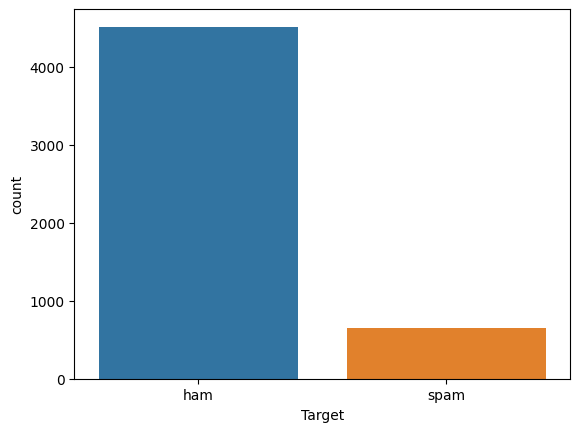

In [19]:
sns.countplot(x=data["Target"])

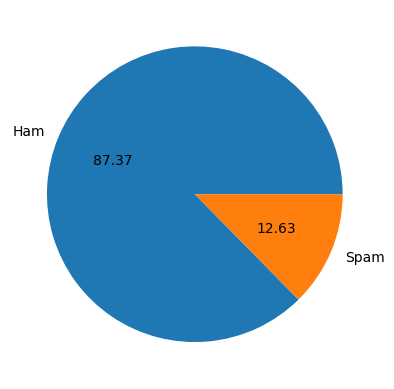

In [20]:
plt.pie(data['Target'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [21]:
encoder=LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])
data['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int64

In [22]:
data.head(10)

,Target,Mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [23]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in data.Mails:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 600,
                background_color ='#f8f8ff',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

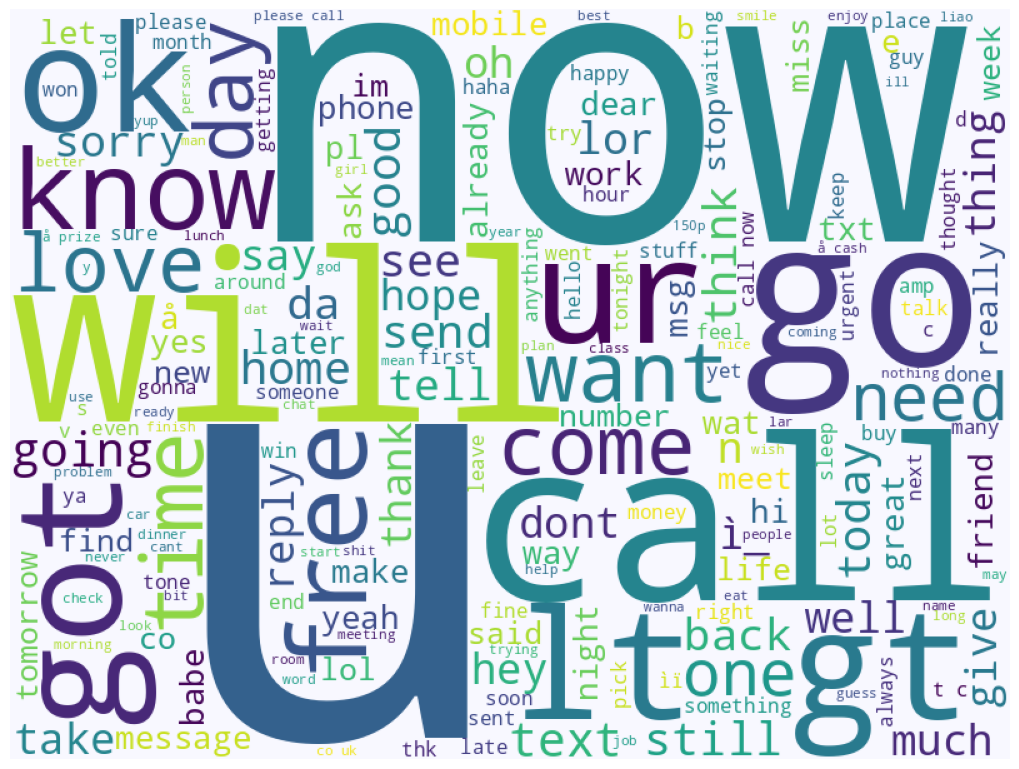

In [24]:
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [25]:
X= data['Mails']
Y= data['Target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= .8)

In [26]:
cv = CountVectorizer()
X_vector= cv.fit_transform(X_train.values)
X_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
X_tcv= cv.fit_transform(X_train)
X_cv=cv.transform(X_test)

In [28]:
lr= LogisticRegression()
lr.fit(X_tcv, Y_train)

LogisticRegression()

In [29]:
Y_lr = lr.predict(X_cv)
print("Accuracy score:", accuracy_score(Y_test, Y_lr))

Accuracy score: 0.9806576402321083


In [30]:
knn= KNeighborsClassifier()
knn.fit(X_tcv, Y_train)

KNeighborsClassifier()

In [31]:
Y_knn = knn.predict(X_cv)
print("Accuracy score:", accuracy_score(Y_test, Y_knn))

Accuracy score: 0.9042553191489362


In [32]:
rfc= RandomForestClassifier()
rfc.fit(X_tcv, Y_train)

RandomForestClassifier()

In [33]:
Y_rfc = rfc.predict(X_cv)
print("Accuracy score:", accuracy_score(Y_test, Y_rfc))

Accuracy score: 0.9700193423597679


In [34]:
dtc = DecisionTreeClassifier()
dtc.fit(X_tcv, Y_train)

DecisionTreeClassifier()

In [35]:
Y_dtc = dtc.predict(X_cv)
print("Accuracy score:", accuracy_score(Y_test, Y_dtc))

Accuracy score: 0.9593810444874274


In [36]:
s= SVC()
s.fit(X_tcv, Y_train)

SVC()

In [37]:
Y_s = s.predict(X_cv)
print("Accuracy score:", accuracy_score(Y_test, Y_s))

Accuracy score: 0.9758220502901354


In [38]:
y_pred = lr.predict(X_cv)
report = classification_report(Y_test, y_pred, target_names=["ham", "spam"])
print(report)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       896
        spam       0.99      0.86      0.92       138

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034

